In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# read the 10-k financial data
data = pd.read_excel("Task_1_Data_Extraction_&_Initial_Analysis.xlsx")

In [3]:
# check the dimensions of dataset
data.shape

(9, 9)

In [4]:
# let's look at the records
data.head(10)

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses(R & D),"Operating Expenses(Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions)
0,Microsoft,2023,211915,72361,411976,205753,27195,30334,57529
1,Microsoft,2022,198270,72738,364840,198298,24512,27725,52237
2,Microsoft,2021,168088,61271,333779,191791,20716,25224,45940
3,Tesla,2023,96773,14974,106618,43009,3969,4800,8769
4,Tesla,2022,81462,12587,82338,36440,3075,3946,7021
5,Tesla,2021,53823,5644,62131,30548,2593,4517,7110
6,Apple,2023,383285,96995,352583,290437,29915,24932,54847
7,Apple,2022,394328,99803,352755,302083,26251,25094,51345
8,Apple,2021,365817,94680,351002,287912,21914,21973,43887


In [5]:
# check datatypes
data.dtypes

Company                                                        object
Year                                                            int64
Total Revenue (in millions)                                    object
Net Income (in millions)                                        int64
Total Assets (in millions)                                      int64
Total Liabilities (in millions)                                 int64
Operating Expenses(R & D)                                       int64
Operating Expenses(Sales & Marketing, Other Administrative)     int64
Total Cash Flow from Operating Activities (in millions)         int64
dtype: object

In [6]:
# convert column Total Revenue (in millions) to int64
data['Total Revenue (in millions)'] = data['Total Revenue (in millions)'].astype('int64')
data['Year'] = data['Year'].astype(str)

In [7]:
# descriptive statistics
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Total Revenue (in millions),9.0,217084.555556,133913.789489,53823.0,96773.0,198270.0,365817.0,394328.0
Net Income (in millions),9.0,59005.888889,38231.680758,5644.0,14974.0,72361.0,94680.0,99803.0
Total Assets (in millions),9.0,268669.111111,140780.645366,62131.0,106618.0,351002.0,352755.0,411976.0
Total Liabilities (in millions),9.0,176252.333333,112621.131472,30548.0,43009.0,198298.0,287912.0,302083.0
Operating Expenses(R & D),9.0,17793.333333,11271.159446,2593.0,3969.0,21914.0,26251.0,29915.0
"Operating Expenses(Sales & Marketing, Other Administrative)",9.0,18727.222222,10964.933205,3946.0,4800.0,24932.0,25224.0,30334.0
Total Cash Flow from Operating Activities (in millions),9.0,36520.555556,22057.674153,7021.0,8769.0,45940.0,52237.0,57529.0


In [8]:
# Calculate year-over-year changes for each financial metric
data = data.sort_values(by=['Company', 'Year'])
data['Revenue Growth (%)'] = data.groupby('Company')['Total Revenue (in millions)'].pct_change() * 100
data['Net Income Growth (%)'] = data.groupby('Company')['Net Income (in millions)'].pct_change() * 100
data['Assets Growth (%)'] = data.groupby('Company')['Total Assets (in millions)'].pct_change() * 100
data['Liabilities Growth (%)'] = data.groupby('Company')['Total Liabilities (in millions)'].pct_change() * 100
data['Cash Flow Growth (%)'] = data.groupby('Company')['Total Cash Flow from Operating Activities (in millions)'].pct_change() * 100

In [9]:
data.head(10)

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses(R & D),"Operating Expenses(Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions),Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
8,Apple,2021,365817,94680,351002,287912,21914,21973,43887,NaN,NaN,NaN,NaN,NaN
7,Apple,2022,394328,99803,352755,302083,26251,25094,51345,7.793788,5.410858,0.499427,4.921990,16.993643
6,Apple,2023,383285,96995,352583,290437,29915,24932,54847,-2.800461,-2.813543,-0.048759,-3.855232,6.820528
2,Microsoft,2021,168088,61271,333779,191791,20716,25224,45940,NaN,NaN,NaN,NaN,NaN
1,Microsoft,2022,198270,72738,364840,198298,24512,27725,52237,17.956071,18.715216,9.305858,3.392756,13.707009
0,Microsoft,2023,211915,72361,411976,205753,27195,30334,57529,6.882030,-0.518299,12.919636,3.759493,10.130750
5,Tesla,2021,53823,5644,62131,30548,2593,4517,7110,NaN,NaN,NaN,NaN,NaN
4,Tesla,2022,81462,12587,82338,36440,3075,3946,7021,51.351653,123.015592,32.523217,19.287678,-1.251758
3,Tesla,2023,96773,14974,106618,43009,3969,4800,8769,18.795267,18.964010,29.488207,18.026894,24.896738


In [10]:
data = data.reset_index(drop='index')
data

,Company,Year,Total Revenue (in millions),Net Income (in millions),Total Assets (in millions),Total Liabilities (in millions),Operating Expenses(R & D),"Operating Expenses(Sales & Marketing, Other Administrative)",Total Cash Flow from Operating Activities (in millions),Revenue Growth (%),Net Income Growth (%),Assets Growth (%),Liabilities Growth (%),Cash Flow Growth (%)
0,Apple,2021,365817,94680,351002,287912,21914,21973,43887,NaN,NaN,NaN,NaN,NaN
1,Apple,2022,394328,99803,352755,302083,26251,25094,51345,7.793788,5.410858,0.499427,4.921990,16.993643
2,Apple,2023,383285,96995,352583,290437,29915,24932,54847,-2.800461,-2.813543,-0.048759,-3.855232,6.820528
3,Microsoft,2021,168088,61271,333779,191791,20716,25224,45940,NaN,NaN,NaN,NaN,NaN
4,Microsoft,2022,198270,72738,364840,198298,24512,27725,52237,17.956071,18.715216,9.305858,3.392756,13.707009
5,Microsoft,2023,211915,72361,411976,205753,27195,30334,57529,6.882030,-0.518299,12.919636,3.759493,10.130750
6,Tesla,2021,53823,5644,62131,30548,2593,4517,7110,NaN,NaN,NaN,NaN,NaN
7,Tesla,2022,81462,12587,82338,36440,3075,3946,7021,51.351653,123.015592,32.523217,19.287678,-1.251758
8,Tesla,2023,96773,14974,106618,43009,3969,4800,8769,18.795267,18.964010,29.488207,18.026894,24.896738


In [12]:
# data.to_csv("financial_data.csv", index=False)

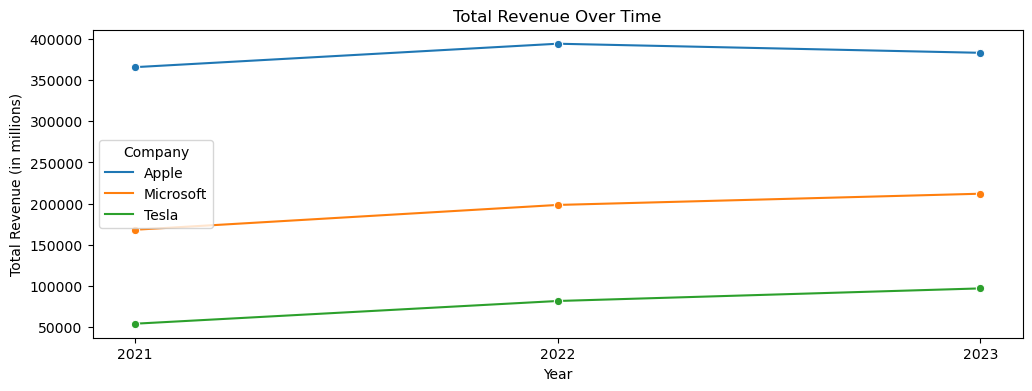

In [13]:
# Line chart for Total Revenue over time
plt.figure(figsize=(12,4))
sns.lineplot(data=data, x='Year', y='Total Revenue (in millions)', hue='Company', marker='o')
plt.title('Total Revenue Over Time')
plt.ylabel('Total Revenue (in millions)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

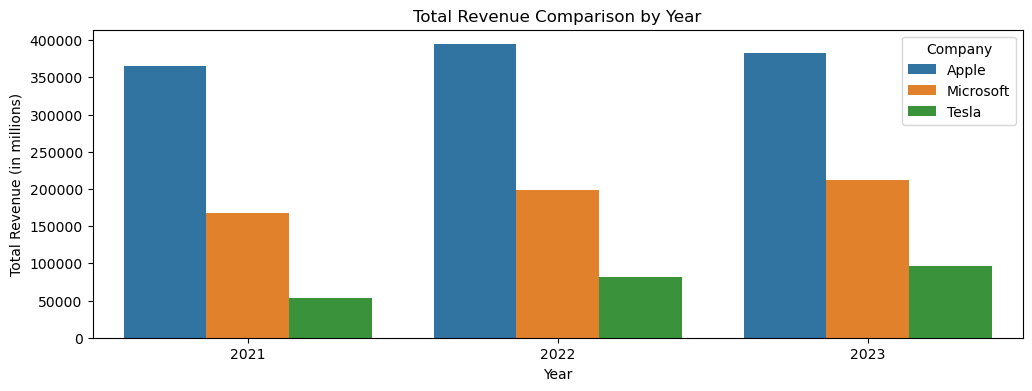

In [14]:
# Bar chart for Total Revenue comparison
plt.figure(figsize=(12,4))
sns.barplot(data=data, x='Year', y='Total Revenue (in millions)', hue='Company')
plt.title('Total Revenue Comparison by Year')
plt.ylabel('Total Revenue (in millions)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

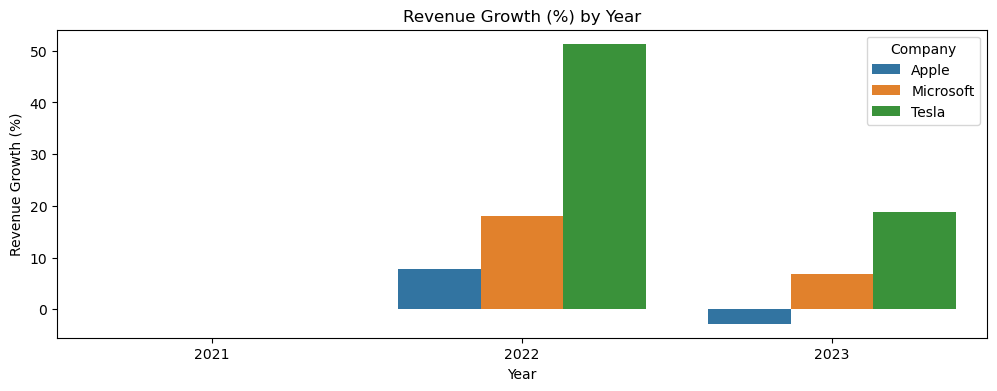

In [15]:
# Bar chart for Revenue Growth (%)
plt.figure(figsize=(12,4))
sns.barplot(data=data, x='Year', y='Revenue Growth (%)', hue='Company')
plt.title('Revenue Growth (%) by Year')
plt.ylabel('Revenue Growth (%)')
plt.xlabel('Year')
plt.grid(False)
plt.show()

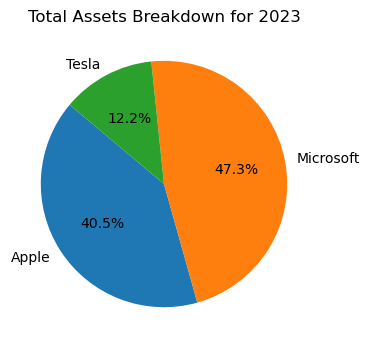

In [16]:
# Pie chart for the breakdown of Total Assets for the most recent year
latest_year = data['Year'].max()
latest_data = data[data['Year'] == latest_year]
latest_assets = latest_data.groupby('Company')['Total Assets (in millions)'].sum()

plt.figure(figsize=(6,4))
plt.pie(latest_assets, labels=latest_assets.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Total Assets Breakdown for {latest_year}')
plt.show()

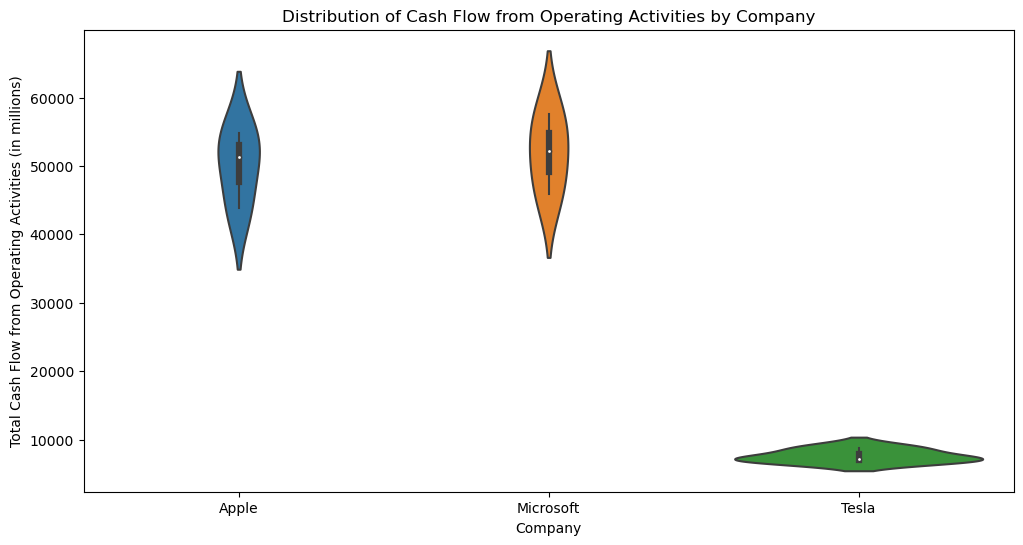

In [17]:
# Violin plot for Cash Flow from Operating Activities
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x='Company', y='Total Cash Flow from Operating Activities (in millions)')
plt.title('Distribution of Cash Flow from Operating Activities by Company')
plt.ylabel('Total Cash Flow from Operating Activities (in millions)')
plt.xlabel('Company')
plt.show()

1. Apple:

- Experienced steady revenue growth in 2022 but a slight decline in 2023.
- Net income followed a similar trend with growth in 2022 and a slight decline in 2023.
- Total assets and liabilities remained relatively stable over the three years.
- Significant cash flow growth in 2022, indicating strong operational efficiency, which continued at a slower rate in 2023.

2. Microsoft:

- Showed strong revenue and net income growth in 2022, followed by a slowdown in 2023.
- Notable growth in total assets, particularly in 2023, suggesting substantial investments or acquisitions.
- Liabilities grew moderately, and cash flow from operations showed consistent growth, reflecting healthy operational performance.

3. Tesla:

- Exhibited the highest revenue growth among the three companies, particularly in 2022.
- Net income growth was exceptionally high in 2022, reflecting improved profitability.
- Continued growth in total assets and liabilities, indicating expansion.
- Despite a slight decline in cash flow from operations in 2022, Tesla showed a strong rebound in 2023, reflecting better cash management and operational efficiency.